In [1]:
import numpy as np
import util as example
from models import funcs
import regression as reg
from optimize.util import optimize

In [2]:
def f(point):
    x, y = point[0], point[1]
    return x ** 2 - x * y + y ** 2 + 9 * x - 6 * y + 20

def grad(point):
    x, y = point[0], point[1]
    return np.array([[2 * x - y + 9], [-x + 2 * y - 6]])

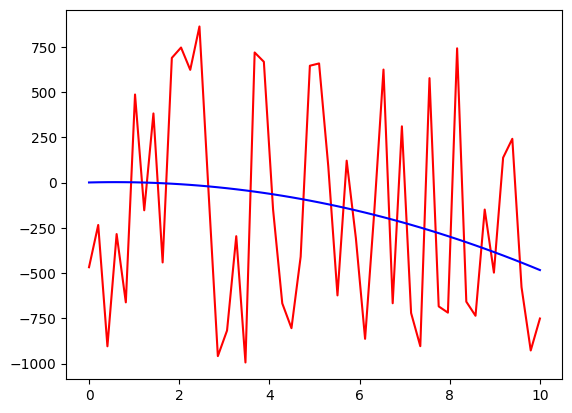

In [3]:
start = 0
end = 10
steps = 50

test_x, test_y = example.generate_test(lambda x: example.random_function(1000)(x), start, end, steps)
x0 = np.array([1., 1.])
func, jac = funcs["square"]
test = optimize(func, jac, reg.regression, reg.grad, method='L_BFGS')

betta = test(test_x, test_y, x0, 1, 10, 1e-4, 100)

X = np.linspace(start, end, steps)
Y = func(X)(betta)

example.show(test_x, test_y, X, Y)

In [4]:
betta

array([-5.47335013,  6.31959512])

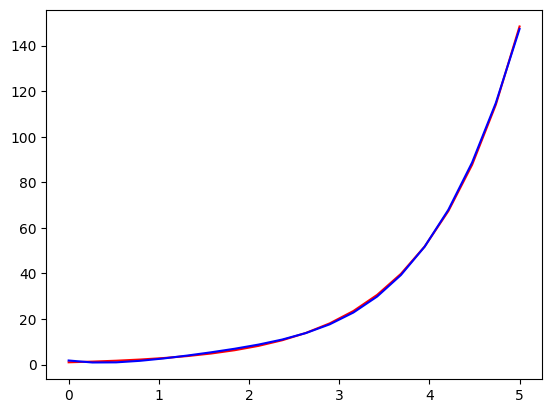

In [5]:
import tests as tests

input = tests.create_tests()

interest = 22
iter = 0
for test in input:
    if iter != interest:
        iter += 1
        continue
    
    func, jac = test.model
    task = optimize(func, jac, reg.regression, reg.grad, method='L_BFGS')
    
    betta = task(test.X, test.Y, test.init_point, 0.1, 10, 1e-4, 10000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    example.show(test.X, test.Y, X, Y)
    
    iter += 1